<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PCA" data-toc-modified-id="PCA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PCA</a></span><ul class="toc-item"><li><span><a href="#Example-1" data-toc-modified-id="Example-1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Example 1</a></span></li><li><span><a href="#Example-2" data-toc-modified-id="Example-2-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Example 2</a></span></li><li><span><a href="#Example-3" data-toc-modified-id="Example-3-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Example 3</a></span></li></ul></li></ul></div>

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Generate data 

In [33]:
x, clases = make_blobs(n_features=10, 
         n_samples=100,
         centers=4, random_state=4,
         cluster_std=2)

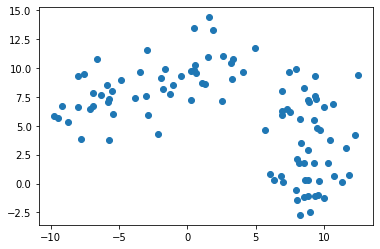

In [34]:
plt.scatter(x[:,1],x[:,2])

In [27]:
df = pd.DataFrame(x[:,1:3])

In [47]:
original_data = pd.DataFrame(x, columns= ['c'+str(i) for i in range(x.shape[1])])
original_data['clase'] = y

In [46]:
original_data.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9
0,1.111460,10.625660,6.917054,7.240412,-7.504841,-10.294909,0.873230,-6.752584,2.724180,0.136606
1,3.922212,-5.457902,6.037059,10.372529,-3.383697,5.837285,-8.166151,-1.318083,-9.058159,9.955288
2,8.998367,1.313214,8.651334,6.086529,0.962872,-7.069004,9.286666,-11.965042,-4.219077,-4.333978
3,0.076301,8.199190,-2.716994,-7.578235,-7.772931,-3.542986,4.285229,3.948615,-1.028294,3.300239
4,8.947106,2.617702,11.026892,0.614568,4.029671,-5.606354,7.968009,-9.516573,-7.851421,-0.191799


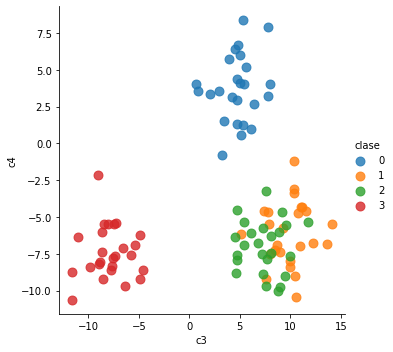

In [49]:
sns.lmplot( x="c3", y="c4",
  data=original_data, 
  fit_reg=False, 
  hue='clase', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

In [50]:
# load make_blobs to simulate data
from sklearn.datasets import make_blobs
# load decomposition to do PCA analysis with sklearn
from sklearn import decomposition

In [51]:
pca = decomposition.PCA(n_components=4)

In [52]:
pc = pca.fit_transform(x)

In [53]:
pc_df = pd.DataFrame(data = pc , 
        columns = ['PC1', 'PC2','PC3','PC4'])
pc_df['Cluster'] = clases
pc_df.head()

,PC1,PC2,PC3,PC4,Cluster
0,-8.133443,-0.302138,9.984672,0.423878,2
1,18.931381,0.193838,0.045462,-3.894042,1
2,-6.571463,-14.188490,-3.120115,1.278588,0
3,-7.533948,14.439427,-5.443487,3.358252,3
4,-4.591760,-11.315284,-9.130630,-1.420151,0


In [54]:
pca.explained_variance_ratio_

array([0.41594854, 0.3391866 , 0.1600729 , 0.02016822])

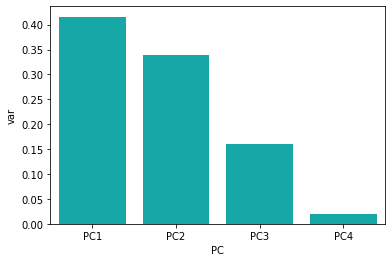

In [55]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
                   'PC':['PC1','PC2','PC3','PC4']})

sns.barplot(x='PC', y="var", data=df, color="c");

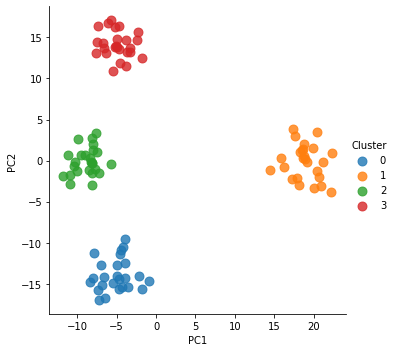

In [56]:
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

In [ ]:
Standardization

In [68]:
X_std = StandardScaler().fit_transform(x)

In [80]:
(X_std).T.dot((X_std)) / (X_std.shape[0]-1)

array([[ 1.01010101, -0.67439335,  0.50881244,  0.23725218,  0.70948856,
         0.12957223,  0.16089465, -0.37771781, -0.65177043,  0.12029123],
       [-0.67439335,  1.01010101, -0.46976712, -0.56662552, -0.26295018,
        -0.42059298,  0.46469459,  0.10685004,  0.79460657, -0.60533919],
       [ 0.50881244, -0.46976712,  1.01010101,  0.63265232,  0.57554008,
        -0.26982362,  0.21578868, -0.71470965, -0.20551072, -0.12234542],
       [ 0.23725218, -0.56662552,  0.63265232,  1.01010101,  0.17073509,
        -0.19091159, -0.2595997 , -0.54374875, -0.15563543,  0.16495049],
       [ 0.70948856, -0.26295018,  0.57554008,  0.17073509,  1.01010101,
        -0.26012536,  0.63204947, -0.66625678, -0.27350978, -0.33736647],
       [ 0.12957223, -0.42059298, -0.26982362, -0.19091159, -0.26012536,
         1.01010101, -0.65170387,  0.62943419, -0.66389046,  0.76313993],
       [ 0.16089465,  0.46469459,  0.21578868, -0.2595997 ,  0.63204947,
        -0.65170387,  1.01010101, -0.5717917 

In [ ]:
Step 5: Compute covariance matrix

In [79]:
# cov_mat = (X_std).T.dot((X_std)) / (X_std.shape[0]-1)

cov_mat = np.cov(X_std.T)

array([[ 1.01010101, -0.67439335,  0.50881244,  0.23725218,  0.70948856,
         0.12957223,  0.16089465, -0.37771781, -0.65177043,  0.12029123],
       [-0.67439335,  1.01010101, -0.46976712, -0.56662552, -0.26295018,
        -0.42059298,  0.46469459,  0.10685004,  0.79460657, -0.60533919],
       [ 0.50881244, -0.46976712,  1.01010101,  0.63265232,  0.57554008,
        -0.26982362,  0.21578868, -0.71470965, -0.20551072, -0.12234542],
       [ 0.23725218, -0.56662552,  0.63265232,  1.01010101,  0.17073509,
        -0.19091159, -0.2595997 , -0.54374875, -0.15563543,  0.16495049],
       [ 0.70948856, -0.26295018,  0.57554008,  0.17073509,  1.01010101,
        -0.26012536,  0.63204947, -0.66625678, -0.27350978, -0.33736647],
       [ 0.12957223, -0.42059298, -0.26982362, -0.19091159, -0.26012536,
         1.01010101, -0.65170387,  0.62943419, -0.66389046,  0.76313993],
       [ 0.16089465,  0.46469459,  0.21578868, -0.2595997 ,  0.63204947,
        -0.65170387,  1.01010101, -0.5717917 

In [78]:
cov_mat

array([[ 1.01010101, -0.67439335,  0.50881244,  0.23725218,  0.70948856,
         0.12957223,  0.16089465, -0.37771781, -0.65177043,  0.12029123],
       [-0.67439335,  1.01010101, -0.46976712, -0.56662552, -0.26295018,
        -0.42059298,  0.46469459,  0.10685004,  0.79460657, -0.60533919],
       [ 0.50881244, -0.46976712,  1.01010101,  0.63265232,  0.57554008,
        -0.26982362,  0.21578868, -0.71470965, -0.20551072, -0.12234542],
       [ 0.23725218, -0.56662552,  0.63265232,  1.01010101,  0.17073509,
        -0.19091159, -0.2595997 , -0.54374875, -0.15563543,  0.16495049],
       [ 0.70948856, -0.26295018,  0.57554008,  0.17073509,  1.01010101,
        -0.26012536,  0.63204947, -0.66625678, -0.27350978, -0.33736647],
       [ 0.12957223, -0.42059298, -0.26982362, -0.19091159, -0.26012536,
         1.01010101, -0.65170387,  0.62943419, -0.66389046,  0.76313993],
       [ 0.16089465,  0.46469459,  0.21578868, -0.2595997 ,  0.63204947,
        -0.65170387,  1.01010101, -0.5717917 

## Calculating eigenvectors and eigenvalues on covariance matrix

In [81]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors n%s' %eig_vecs)
print('nEigenvalues n%s' %eig_vals)

Eigenvectors n[[ 4.39443783e-01  2.82824552e-02 -3.51190024e-01  3.70603157e-01
   4.01003329e-01  1.14695454e-01 -4.97209175e-01  3.06568832e-02
  -3.49430593e-01  3.45089461e-02]
 [-4.46270231e-01  2.18608795e-01 -8.00172827e-02 -2.24446417e-01
  -2.12457292e-01 -8.11401140e-02 -1.45518837e-01 -1.10850102e-01
  -7.53837622e-01  2.06924284e-01]
 [ 3.95916669e-01  2.00070126e-01  2.21999656e-01 -7.44687172e-01
   4.26343531e-01 -6.14572305e-02  4.57695507e-02 -3.77951068e-02
  -9.99444829e-02 -1.79188702e-02]
 [ 3.29502227e-01  4.02240779e-02  6.18539767e-01  2.12553101e-01
  -3.31979357e-01  5.23960999e-02  1.59202192e-02  3.79169480e-01
  -3.59006914e-01 -2.75999066e-01]
 [ 3.39341736e-01  2.77744460e-01 -3.63110689e-01 -1.61045225e-02
  -4.05820835e-01 -4.23774143e-01  8.53992890e-02 -3.52642805e-01
  -4.30073730e-03 -4.46825376e-01]
 [ 6.69506007e-02 -4.40155735e-01 -2.43616777e-01 -4.53662099e-01
  -4.00960668e-01  3.32704850e-01 -4.31709120e-01  1.90127509e-01
   7.32290252e-02 -

In [82]:
# Visually confirm that the list is correctly sorted by decreasing eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]


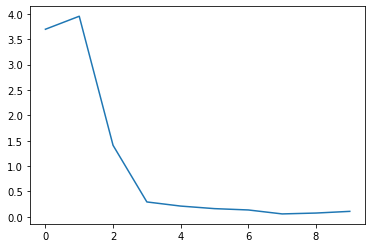

In [84]:
plt.plot(eig_vals)

In [ ]:
pca = pd.DataFrame({'pca1': eig_pairs[0], 'pca2': eig_pairs[0]})

In [94]:
proj = pd.DataFrame(x.dot(eig_vecs[:,0:2]), columns=['p1', 'p2'])
proj['clase'] = y

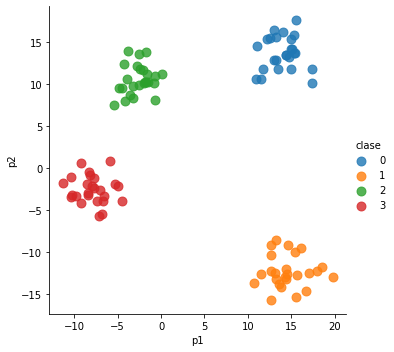

In [97]:
sns.lmplot( x="p1", y="p2",
  data=proj, 
  fit_reg=False, 
  hue='clase', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

# LDA

In [99]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(x, y)
x_lda = lda.transform(x)

In [102]:
df_lda = pd.DataFrame(x_lda, columns=['p1', 'p2'])
df_lda['clase'] = y

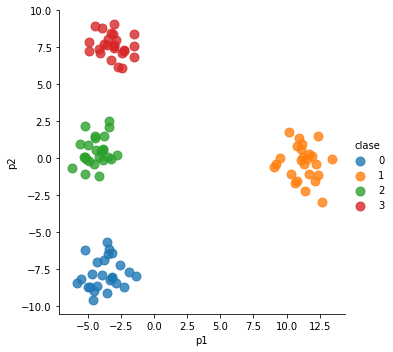

In [103]:
sns.lmplot( x="p1", y="p2",
  data=df_lda, 
  fit_reg=False, 
  hue='clase', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size

## Example 1

We load the famous cancer dataset -- https://s3-eu-west-1.amazonaws.com/ih-materials/uploads/data-static/data/module-2/breast-cancer.csv

In [2]:
import pandas as pd
import numpy as np

total_cols = ['id', 'outcome', 'time', 'cell_1_radius', 'cell_1_texture', 'cell_1_perimiter',
              'cell_1_area', 'cell_1_smoothness', 'cell_1_compactness', 'cell_1_concavity',
              'cell_1_concave_points', 'cell_1_symmetry', 'cell_1_fractal_dimension',
              'cell_2_radius', 'cell_2_texture', 'cell_2_perimiter', 'cell_2_area',
              'cell_2_smoothness', 'cell_2_compactness', 'cell_2_concavity',
              'cell_2_concave_points', 'cell_2_symmetry', 'cell_2_fractal_dimension', 'cell_3_radius', 
              'cell_3_texture', 'cell_3_perimiter', 'cell_3_area', 'cell_3_smoothness',
              'cell_3_compactness', 'cell_3_concavity', 'cell_3_concave_points', 'cell_3_symmetry',
              'cell_3_fractal_dimension', 'tumor_size', 'lymph_status']
breast_cancer = pd.read_csv('data/breast-cancer.csv', names=total_cols)
breast_cancer.head()

,id,outcome,time,cell_1_radius,cell_1_texture,cell_1_perimiter,cell_1_area,cell_1_smoothness,cell_1_compactness,cell_1_concavity,...,cell_3_perimiter,cell_3_area,cell_3_smoothness,cell_3_compactness,cell_3_concavity,cell_3_concave_points,cell_3_symmetry,cell_3_fractal_dimension,tumor_size,lymph_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


Now we will extract only the numeric columns and find the principal components using the PCA function. For this example, we will limit ourselves to only 2 components.

In [3]:
from sklearn.decomposition import PCA

numeric_columns = [x for x in total_cols if x not in ['id', 'outcome', 'time', 'lymph_status']]
breast_cancer_numeric = breast_cancer[numeric_columns]

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(np.array(breast_cancer_numeric))

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


principalDf.head()

,principal component 1,principal component 2
0,48.324122,-21.790823
1,552.887150,280.321770
2,672.696002,-78.579967
3,-1019.263463,89.149593
4,312.001158,-198.839705


In [4]:
pca.explained_variance_ratio_

array([0.96498772, 0.03299286])

## Example 2

In [5]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [8]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [9]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


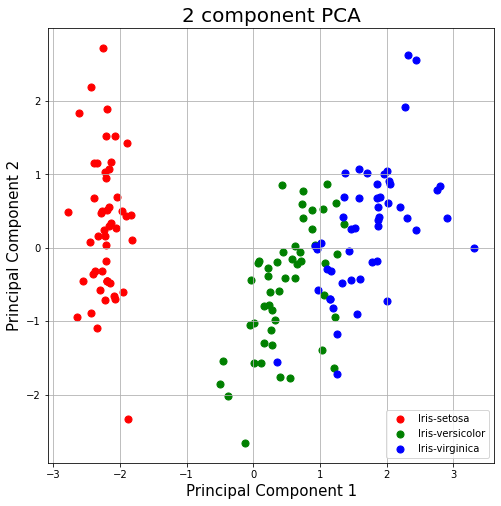

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Example 3

In [11]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7) 
image_shape = people.images[0].shape

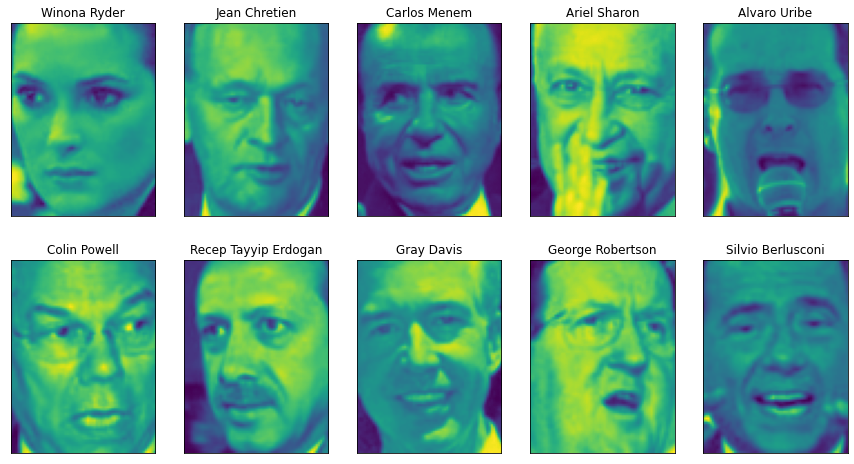

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()): 
    ax.imshow(image)
    ax.set_title(people.target_names[target])

There are 3,023 images, each 87×65 pixels large, belonging to 62 different people:

In [13]:
print("people.images.shape: {}".format(people.images.shape)) 
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


The dataset is a bit skewed, however, containing a lot of images of George W. Bush and Colin Powell, as you can see here:

In [14]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ') 
    if(i+1)%3==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

To make the data less skewed, we will only take up to 50 images of each person (otherwise, the feature extraction would be overwhelmed by the likelihood of George W. Bush):

In [15]:
mask = np.zeros(people.target.shape, dtype=np.bool) 
for target in np.unique(people.target):
        mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]
# scale the grayscale values to be between 0 and 1 # instead of 0 and 255 for better numeric stability 
X_people = X_people / 255

In [16]:
from sklearn.neighbors import KNeighborsClassifier # split the data into training and test sets 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0) # build a KNeighborsClassifier using one neighbor

knn = KNeighborsClassifier(n_neighbors=1) 
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


In [17]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [17]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


In [18]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


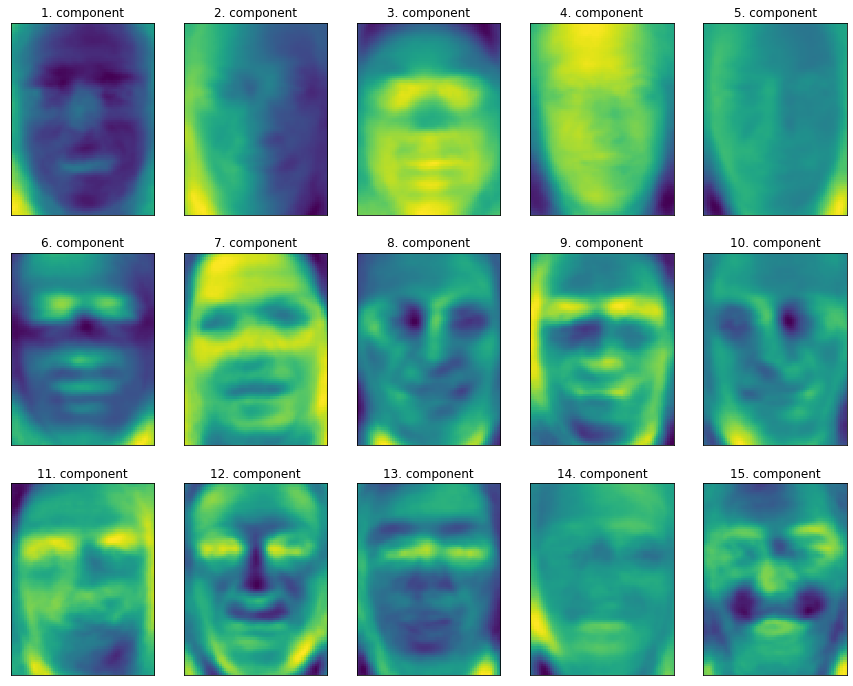

In [19]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())): 
    ax.imshow(component.reshape(image_shape),cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

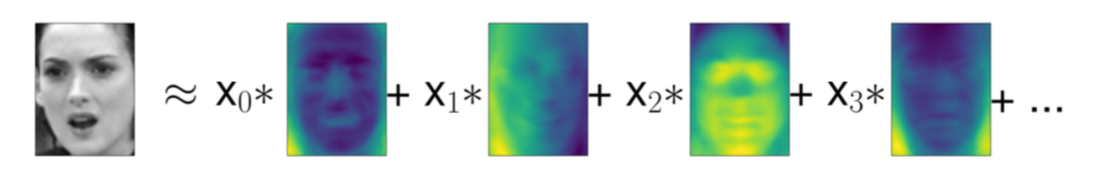

In [20]:
from IPython.display import Image
Image("PCA_image.png")